# Analysis of Literacy in Asia

Dataset used: http://data.un.org/Data.aspx?d=POP&f=tableCode%3a31

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [91]:
literacy_asia = pd.read_csv('../data/literacy_asia.csv')
literacy_asia.head()

,Country,Area,Sex,Literacy,Decade,GDP_Per_Capita,Life_Expectancy,Value,total_pop,pop_perc
0,Bahrain,Total,Both Sexes,Illiterate,2000,48245.775482,75.908,31569,257461,12.261663
1,Bahrain,Total,Both Sexes,Literate,2000,48245.775482,75.908,225892,257461,87.738337
2,Bahrain,Total,Both Sexes,Total,2000,48245.775482,75.908,257461,257461,100.000000
3,Bahrain,Total,Both Sexes,Illiterate,2010,44599.804972,78.748,53712,986968,5.442122
4,Bahrain,Total,Both Sexes,Literate,2010,44599.804972,78.748,933059,986968,94.537918


Initially I was going to look at wordwide literacy, but the data was really messy. I chose to focus on Asia because there were a wide range of GDP per capita and life expectancy values. My working theory is that high literacy rates will correlate to high GDP and life expectancy.

In [92]:
gdp_le = pd.read_csv('../data/gdp_le.csv')

First, check the correlation between Asian countries GDP and life expectancy.

In [93]:
asia_gdp_le_2019 = gdp_le.loc[(gdp_le.Continent == 'Asia') & (gdp_le.Year == 2019)]

asia_gdp_le_2019['Life_Expectancy'].corr(asia_gdp_le_2019['GDP_Per_Capita'])

0.7601545020890943

The correlation between GDP and life expectancy is actually stronger for Asian countries than for the world in general. In the guided portion of the project, the correlation was 0.72 vs 0.76 for Asian countries.

### What decades are represented in the data?

In [94]:
literacy_asia.groupby('Decade')['Country'].nunique()

Decade
1990     6
2000    21
2010    15
2020     4
Name: Country, dtype: int64

Not all countries in the dataset have data included for all decades represented in the dataset. The data is almost always derived from census findings so standardizing the years by decade makes the most sense. (I calculated the decade year from the data collection year in the original dataset and rounded down, so 1990 includes all data collected from 1990-1999 and so on.)

### How does literacy correlate to GDP per capita?

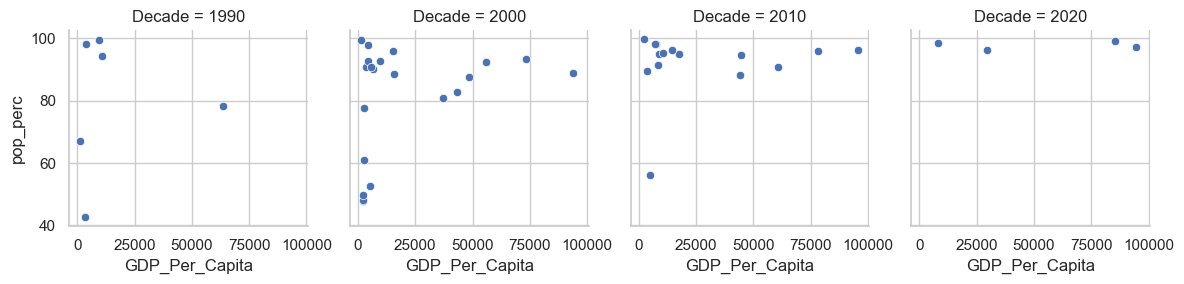

In [95]:
# subset dataframe by decade and total population
literacy_decade_total = (
    literacy_asia.loc[(literacy_asia.Literacy == 'Literate') &
                      (literacy_asia.Area == 'Total') &
                      (literacy_asia.Sex == 'Both Sexes')]
)

# create facetgrid
g = sns.FacetGrid(data = literacy_decade_total, col = 'Decade')
g.map(sns.scatterplot, 'GDP_Per_Capita', 'pop_perc');

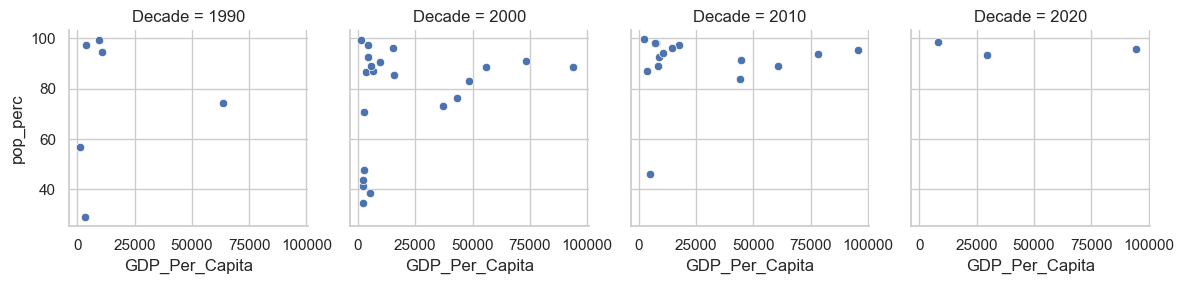

In [96]:
literacy_decade_female = (
    literacy_asia.loc[(literacy_asia.Literacy == 'Literate') &
                      (literacy_asia.Area == 'Total') &
                      (literacy_asia.Sex == 'Female')]
)

g = sns.FacetGrid(data = literacy_decade_female, col = 'Decade')
g.map(sns.scatterplot, 'GDP_Per_Capita', 'pop_perc');

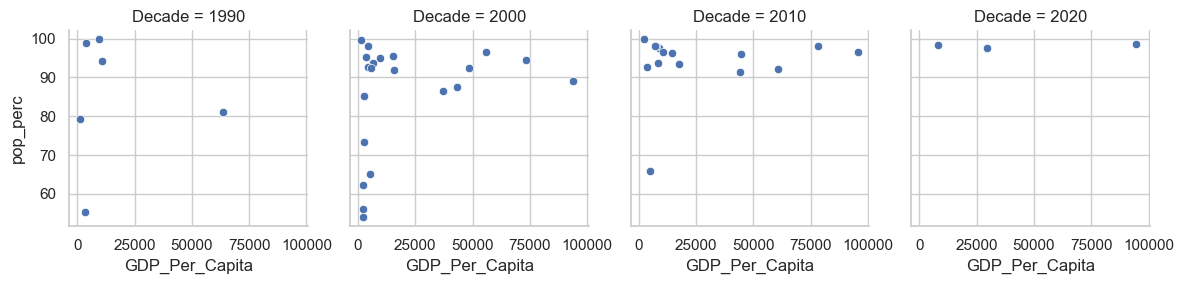

In [97]:
literacy_decade_male = (
    literacy_asia.loc[(literacy_asia.Literacy == 'Literate') &
                      (literacy_asia.Area == 'Total') &
                      (literacy_asia.Sex == 'Male')]
)

g = sns.FacetGrid(data = literacy_decade_male, col = 'Decade')
g.map(sns.scatterplot, 'GDP_Per_Capita', 'pop_perc');

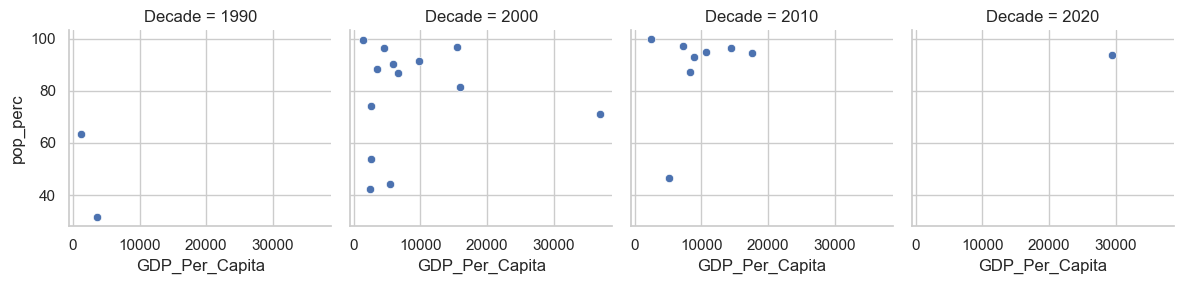

In [98]:
literacy_decade_rural = (
    literacy_asia.loc[(literacy_asia.Literacy == 'Literate') &
                      (literacy_asia.Area == 'Rural') &
                      (literacy_asia.Sex == 'Both Sexes')]
)

g = sns.FacetGrid(data = literacy_decade_rural, col = 'Decade')
g.map(sns.scatterplot, 'GDP_Per_Capita', 'pop_perc');

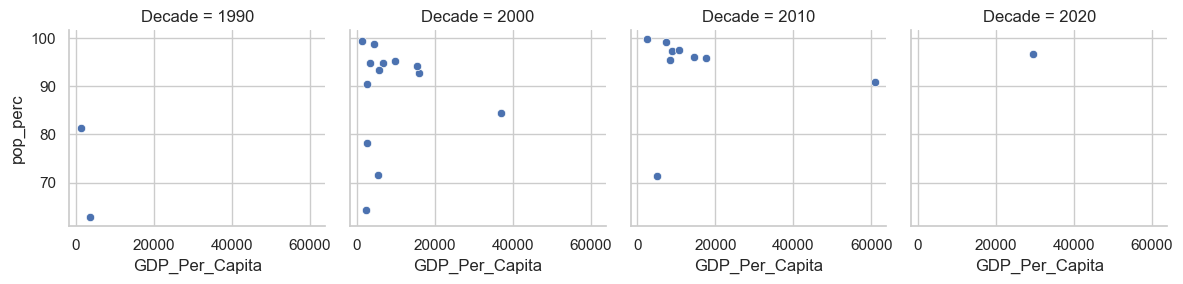

In [99]:
literacy_decade_urban = (
    literacy_asia.loc[(literacy_asia.Literacy == 'Literate') &
                      (literacy_asia.Area == 'Urban') &
                      (literacy_asia.Sex == 'Both Sexes')]
)

g = sns.FacetGrid(data = literacy_decade_urban, col = 'Decade')
g.map(sns.scatterplot, 'GDP_Per_Capita', 'pop_perc');

Although I would like to have more datapoints over time (ie more decades of census results) there does seem to be a trend of increasing literacy over time even at low GDP_Per_Capita values. There are not enough countries with urban vs rural breakouts to determine if area of residence is a determining factor in literacy.

### How does literacy correlate to life expectancy?

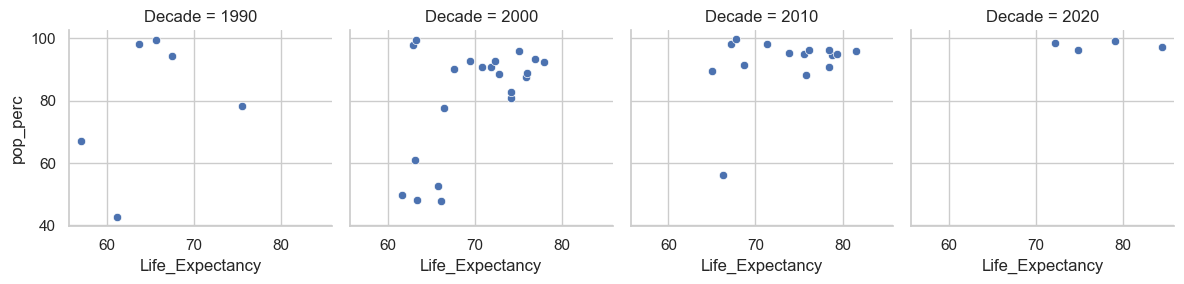

In [100]:
g = sns.FacetGrid(data = literacy_decade_total, col = 'Decade')
g.map(sns.scatterplot, 'Life_Expectancy', 'pop_perc');

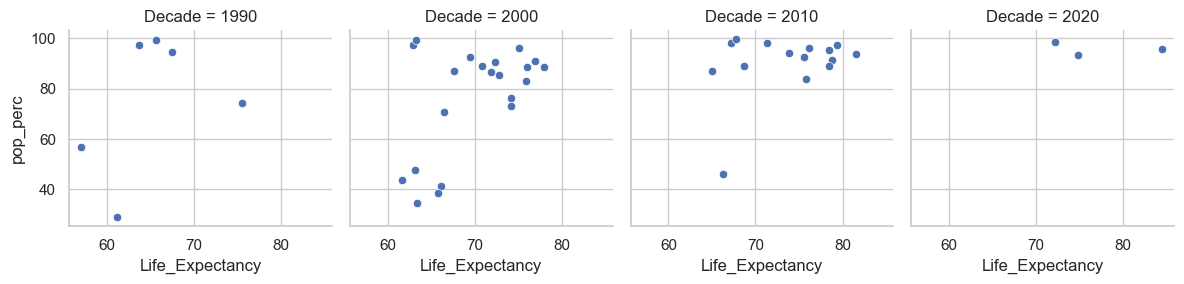

In [101]:
g = sns.FacetGrid(data = literacy_decade_female, col = 'Decade')
g.map(sns.scatterplot, 'Life_Expectancy', 'pop_perc');

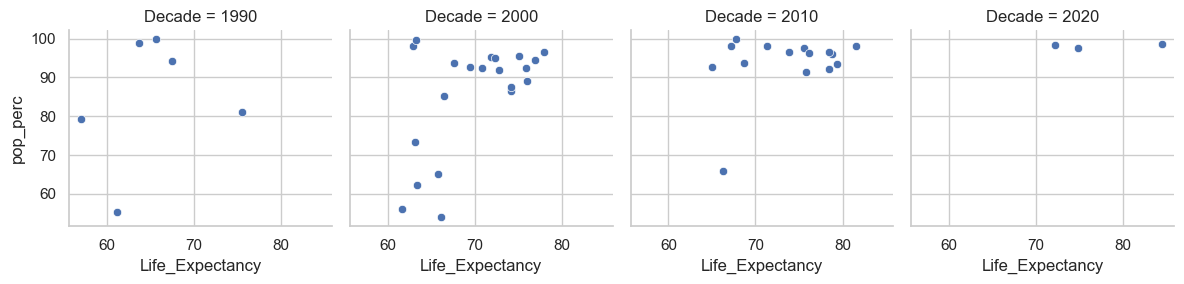

In [102]:
g = sns.FacetGrid(data = literacy_decade_male, col = 'Decade')
g.map(sns.scatterplot, 'Life_Expectancy', 'pop_perc');

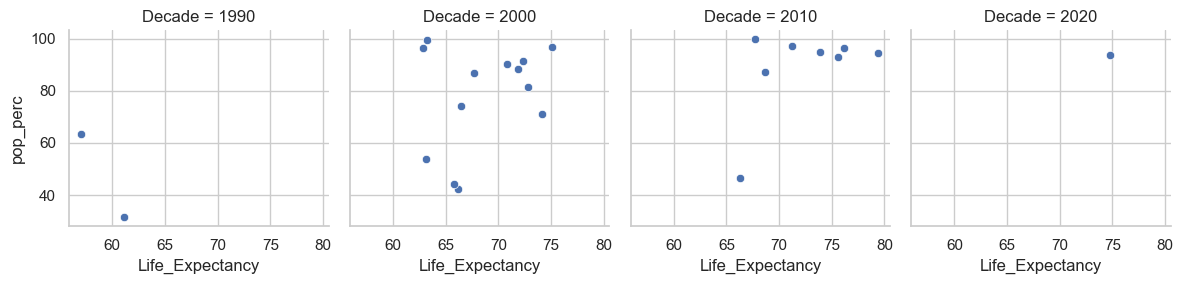

In [103]:
g = sns.FacetGrid(data = literacy_decade_rural, col = 'Decade')
g.map(sns.scatterplot, 'Life_Expectancy', 'pop_perc');

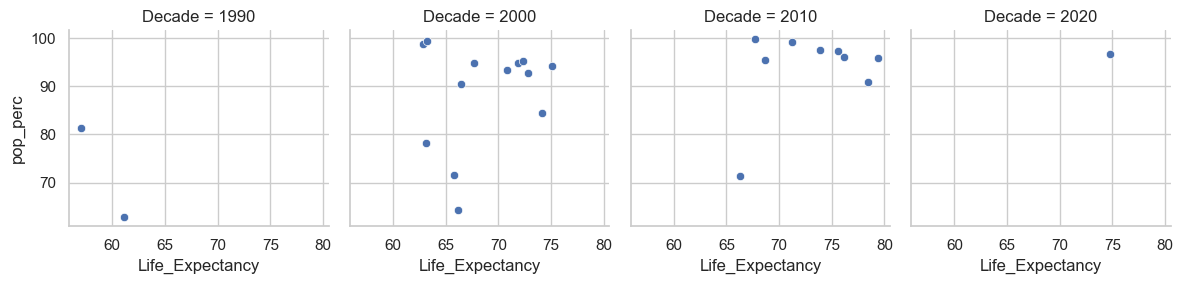

In [104]:
g = sns.FacetGrid(data = literacy_decade_urban, col = 'Decade')
g.map(sns.scatterplot, 'Life_Expectancy', 'pop_perc');

While the relationship between life expectancy and literacy is not extremely strong, there does seem to be a tendency for countries with lower life expectancy to also have lower literacy rates.

In [105]:
literacy_2000 = (
    literacy_asia.loc[(literacy_asia.Literacy == 'Literate') &
                      (literacy_asia.Area == 'Total') &
                      (literacy_asia.Sex == 'Both Sexes') &
                      (literacy_asia.Decade == 2000)]
)

print(literacy_2000['pop_perc'].corr(literacy_2000['GDP_Per_Capita']))
print(literacy_2000['pop_perc'].corr(literacy_2000['Life_Expectancy']))

0.31569078264227846
0.5468263742715604


In [106]:
literacy_2000_female = (
    literacy_asia.loc[(literacy_asia.Literacy == 'Literate') &
                      (literacy_asia.Area == 'Total') &
                      (literacy_asia.Sex == 'Female') &
                      (literacy_asia.Decade == 2000)]
)

print(literacy_2000_female['pop_perc'].corr(literacy_2000_female['GDP_Per_Capita']))
print(literacy_2000_female['pop_perc'].corr(literacy_2000_female['Life_Expectancy']))

0.3090864892028104
0.5296585220028299


In [107]:
literacy_2000_male = (
    literacy_asia.loc[(literacy_asia.Literacy == 'Literate') &
                      (literacy_asia.Area == 'Total') &
                      (literacy_asia.Sex == 'Male') &
                      (literacy_asia.Decade == 2000)]
)

print(literacy_2000_male['pop_perc'].corr(literacy_2000_male['GDP_Per_Capita']))
print(literacy_2000_male['pop_perc'].corr(literacy_2000_male['Life_Expectancy']))

0.2996326391692388
0.5431827754743302


I picked the 2000s decade since it had the most observations to calculate the correlations: the correlation between GDP and literacy was much weaker than the correlation with life expectancy. There was not a meaningful difference between male and female populations. It is logical that lower rates of literacy would be correlated with lower life expectancy - research in the UK has found a strong link between these two factors and speculate that poor literacy can also lead to poor health outcomes. This makes sense to me - think of trying to navigate a health system if you're unable to read directions on medication or how to handle a medical condition.

In [108]:
literacy_2000.sort_values('pop_perc')

,Country,Area,Sex,Literacy,Decade,GDP_Per_Capita,Life_Expectancy,Value,total_pop,pop_perc
31,Bangladesh,Total,Both Sexes,Literate,2000,2365.785074,66.13500,36261109,75784991,47.847349
526,Nepal,Total,Both Sexes,Literate,2000,2136.328983,63.33600,6645205,13788347,48.194356
979,Timor-Leste,Total,Both Sexes,Literate,2000,2258.384170,61.62800,259321,520265,49.844022
61,Bhutan,Total,Both Sexes,Literate,2000,5456.707750,65.80500,224473,425023,52.814318
223,India,Total,Both Sexes,Literate,2000,2656.655208,63.09100,405472902,664999516,60.973413
113,Cambodia,Total,Both Sexes,Literate,2000,2640.631628,66.47000,6891035,8881890,77.585232
562,Oman,Total,Both Sexes,Literate,2000,36946.719448,74.14000,1255141,1548916,81.033510
742,Saudi Arabia,Total,Both Sexes,Literate,2000,43210.230231,74.15300,12339189,14892017,82.857742
1,Bahrain,Total,Both Sexes,Literate,2000,48245.775482,75.90800,225892,257461,87.738337
379,Malaysia,Total,Both Sexes,Literate,2000,15917.057167,72.77500,13095879,14766276,88.687757


Low literacy rates are correlated (at least moderately) with lower life expectancy, but are unlikely to be the sole determining factor. In the Asian countries with literacy rates below 50%, for example, Bangladesh and Nepal have high air pollution which shortens the average life expectancy by several years, and Timor-Leste has high rates of malnutrition. Spending on education alse seems to make a significant difference. Cambodia, with similar life expectancy and GDP to Bangladesh, had a literacy rate over 77%. Conclusion - it's a complex issue with many interacting variables.


In [109]:
decades = [1990, 2000, 2010, 2020]
correlations = []

def literacy_corr(variable, area, sex):
    for decade in decades:
        print(decade, variable, area, sex)
        literacy_decade = (
        literacy_asia.loc[(literacy_asia.Literacy == 'Literate') &
                          (literacy_asia.Area == area) &
                          (literacy_asia.Sex == sex) &
                          (literacy_asia.Decade == decade)]
                          )
        correlation = literacy_decade['pop_perc'].corr(literacy_decade[variable])
        correlations.append(correlation)
    return correlations


In [110]:
gdp_tot_both = literacy_corr('GDP_Per_Capita', 'Total', 'Both Sexes')
gdp_tot_fem = literacy_corr('GDP_Per_Capita', 'Total', 'Female')
gdp_tot_male = literacy_corr('GDP_Per_Capita', 'Total', 'Male')
gdp_rural_both = literacy_corr('GDP_Per_Capita', 'Rural', 'Both Sexes')
gdp_rural_fem = literacy_corr('GDP_Per_Capita', 'Rural', 'Female')
gdp_rural_male = literacy_corr('GDP_Per_Capita', 'Rural', 'Male')
gdp_urban_both = literacy_corr('GDP_Per_Capita', 'Urban', 'Both Sexes')
gdp_urban_fem = literacy_corr('GDP_Per_Capita', 'Urban', 'Female')
gdp_urban_male = literacy_corr('GDP_Per_Capita', 'Urban', 'Male')

1990 GDP_Per_Capita Total Both Sexes
2000 GDP_Per_Capita Total Both Sexes
2010 GDP_Per_Capita Total Both Sexes
2020 GDP_Per_Capita Total Both Sexes
1990 GDP_Per_Capita Total Female
2000 GDP_Per_Capita Total Female
2010 GDP_Per_Capita Total Female
2020 GDP_Per_Capita Total Female
1990 GDP_Per_Capita Total Male
2000 GDP_Per_Capita Total Male
2010 GDP_Per_Capita Total Male
2020 GDP_Per_Capita Total Male
1990 GDP_Per_Capita Rural Both Sexes
2000 GDP_Per_Capita Rural Both Sexes
2010 GDP_Per_Capita Rural Both Sexes
2020 GDP_Per_Capita Rural Both Sexes
1990 GDP_Per_Capita Rural Female
2000 GDP_Per_Capita Rural Female
2010 GDP_Per_Capita Rural Female
2020 GDP_Per_Capita Rural Female
1990 GDP_Per_Capita Rural Male
2000 GDP_Per_Capita Rural Male
2010 GDP_Per_Capita Rural Male
2020 GDP_Per_Capita Rural Male
1990 GDP_Per_Capita Urban Both Sexes
2000 GDP_Per_Capita Urban Both Sexes
2010 GDP_Per_Capita Urban Both Sexes
2020 GDP_Per_Capita Urban Both Sexes
1990 GDP_Per_Capita Urban Female
2000 GDP_Pe

/Users/teresawhitesell/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/teresawhitesell/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [111]:

gdp_corr = (
    pd.DataFrame(
        list(zip(decades, gdp_tot_both, gdp_rural_both, gdp_urban_both, 
                 gdp_tot_fem, gdp_rural_fem, gdp_urban_fem, 
                 gdp_tot_male, gdp_rural_male, gdp_urban_male)),
        columns = ['decade', 'gdp_tot_both', 'gdp_rural_both', 'gdp_urban_both', 
                   'gdp_tot_fem', 'gdp_rural_fem', 'gdp_urban_fem', 
                   'gdp_tot_male', 'gdp_rural_male', 'gdp_urban_male']
    )
)

gdp_corr

,decade,gdp_tot_both,gdp_rural_both,gdp_urban_both,gdp_tot_fem,gdp_rural_fem,gdp_urban_fem,gdp_tot_male,gdp_rural_male,gdp_urban_male
0,1990,0.057227,0.057227,0.057227,0.057227,0.057227,0.057227,0.057227,0.057227,0.057227
1,2000,0.315691,0.315691,0.315691,0.315691,0.315691,0.315691,0.315691,0.315691,0.315691
2,2010,0.151488,0.151488,0.151488,0.151488,0.151488,0.151488,0.151488,0.151488,0.151488
3,2020,0.151144,0.151144,0.151144,0.151144,0.151144,0.151144,0.151144,0.151144,0.151144
